In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [106]:
root_dir = Path('results_from_norm')

In [107]:
ss_components = np.load(root_dir.joinpath('space_shape_components.npy'))
ss_variance = np.load(root_dir.joinpath('space_shape_variance.npy'))
ts_components = np.load(root_dir.joinpath('space_traj_components.npy'))
ts_variance = np.load(root_dir.joinpath('space_traj_variance.npy'))

original_space_shape = np.array([63, 30, 9, 2])

In [108]:
ss_df = pd.DataFrame(ss_components.reshape(-1, 2))
ss_df.columns = ['x', 'y']
ss_df['ss_comp'] = np.repeat(np.arange(1,ss_components.shape[0] + 1), original_space_shape[2])
ss_df['pnt'] = np.repeat([np.arange(1,original_space_shape[2] + 1)], ss_components.shape[0], axis=0).flatten()
ss_df = ss_df.groupby(['ss_comp', 'pnt']).sum()
ss_df['squared_sum'] = ss_df['x'] ** 2 + ss_df['y'] ** 2
(ss_df[['x','y']] ** 2).groupby('ss_comp').sum()

,x,y
ss_comp,,
1,0.687592,0.312408
2,0.471934,0.528066
3,0.809820,0.190180
4,0.414644,0.585356


In [109]:
ss_df

x         y  squared_sum
ss_comp pnt                                 
1       1    0.192314  0.260090     0.104631
        2    0.218991  0.051945     0.050656
        3    0.477637 -0.273209     0.302780
        4    0.292510 -0.195405     0.123745
        5   -0.279271 -0.088547     0.085833
        6   -0.269233 -0.114658     0.085633
        7   -0.238759 -0.068250     0.061664
        8   -0.240531  0.136603     0.076516
        9   -0.153658  0.291430     0.108542
2       1    0.208141  0.466777     0.261203
        2   -0.099525  0.243631     0.069261
        3   -0.111622  0.103912     0.023257
        4    0.081444  0.022912     0.007158
        5    0.425874  0.021404     0.181827
        6    0.089483 -0.106499     0.019349
        7   -0.072757 -0.278095     0.082630
        8   -0.074503 -0.374882     0.146087
        9   -0.446535 -0.099160     0.209226
3       1    0.731298 -0.138282     0.553918
        2    0.026701 -0.163879     0.027569
        3   -0.274552 -0.179575     0.107626
        4   -0.379002 -0.135595     0.162029
        5    0.040464  0.044807     0.003645
        6    0.054714  0.066632     0.007433
        7    0.079539  0.133876     0.024249
        8   -0.087779  0.185615     0.042158
        9   -0.191382  0.186400     0.071372
4       1   -0.056791 -0.319956     0.105597
        2    0.406906  0.227128     0.217160
        3    0.185582  0.446003     0.233360
        4   -0.239376  0.110831     0.069585
        5   -0.015492 -0.341956     0.117174
        6    0.114795 -0.295869     0.100716
        7    0.031684  0.042135     0.002779
        8   -0.058112  0.117207     0.017114
        9   -0.369196  0.014476     0.136515

In [110]:
ts_components.shape

(4, 120)

In [111]:
ts_df = pd.DataFrame(ts_components.reshape(-1, len(ss_variance)))

ts_df.columns = [f'ss{i}' for i in range(len(ss_variance))]
ts_df['ts_comp'] = np.repeat(np.arange(1,ts_components.shape[0] + 1), original_space_shape[1])
ts_df['time'] = np.repeat([np.arange(1,original_space_shape[1]+1)], ts_components.shape[0], axis=0).flatten()
ts_df = ts_df.groupby(['ts_comp', 'time']).sum()
ts_df['squared_sum'] = (ts_df ** 2).sum(axis=1)
ts_df

ss0       ss1       ss2       ss3  squared_sum
ts_comp time                                                     
1       1    -0.104811 -0.071926  0.042922 -0.073549     0.023410
        2    -0.054072 -0.103250  0.040025 -0.008350     0.015256
        3     0.002713 -0.106357  0.026657  0.045921     0.014138
        4     0.060370 -0.078107  0.008569  0.079677     0.016167
        5     0.113512 -0.028512 -0.008744  0.098326     0.023442
...                ...       ...       ...       ...          ...
4       26    0.092219  0.037703 -0.006392  0.074164     0.015467
        27    0.160903  0.048228  0.017429  0.172015     0.058109
        28    0.221836  0.057183  0.037348  0.237792     0.110421
        29    0.221081  0.049114  0.038998  0.230982     0.106163
        30    0.146841  0.020881  0.017958  0.152672     0.045630

[120 rows x 5 columns]

In [112]:
ss_variance

array([0.36243133, 0.25974982, 0.1079715 , 0.06490878])

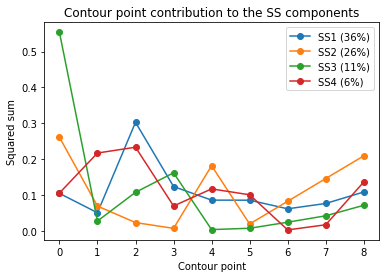

In [113]:
for i, comp in enumerate(ss_components.reshape(-1, 9, 2)):
    squared_sum = np.sum(comp ** 2, axis=1)
    variance = ss_variance[i]
    plt.plot(squared_sum, label=f'SS{i+1} ({variance*100:0.0f}%)', marker='o')
plt.legend()
plt.xlabel('Contour point')
plt.ylabel('Squared sum')
title = 'Contour point contribution to the SS components'
plt.title(title)
plt.savefig(root_dir.joinpath(title + '.png'))

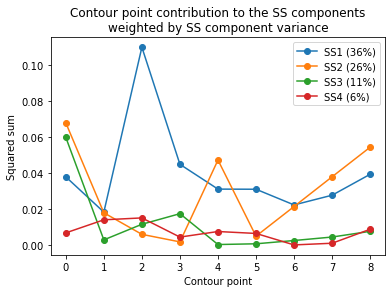

In [114]:
for i, comp in enumerate(ss_components.reshape(-1, 9, 2)):
    squared_sum = np.sum(comp ** 2, axis=1)
    variance = ss_variance[i]
    plt.plot(squared_sum * variance, label=f'SS{i+1} ({variance*100:0.0f}%)', marker='o')
plt.legend()
plt.xlabel('Contour point')
plt.ylabel('Squared sum')
title = 'Contour point contribution to the SS components\nweighted by SS component variance'
plt.title(title)
plt.savefig(root_dir.joinpath(title + '.png'))

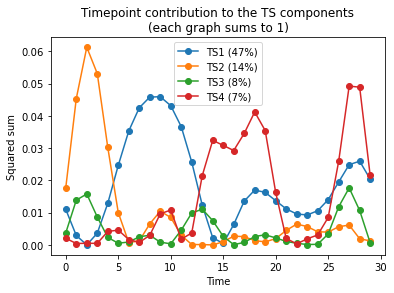

In [115]:
n_ts_comps = 5
for i, comp in enumerate(ts_components.reshape(-1, 30, len(ss_variance))[:n_ts_comps]):
    plt.plot(np.sum(comp[:,::len(ss_variance)] ** 2, axis=1), label=f'TS{i+1} ({ts_variance[i]*100:0.0f}%)', marker='o')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Squared sum')
title = 'Timepoint contribution to the TS components\n(each graph sums to 1)'
plt.title(title)
plt.savefig(root_dir.joinpath(title + '.png'))

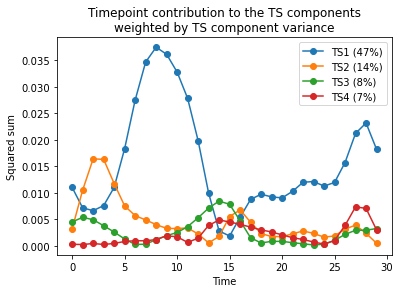

In [116]:
n_ts_comps = 5
for i, comp in enumerate(ts_components.reshape(-1, 30, len(ss_variance))[:n_ts_comps]):
    squared_sum = np.sum(comp[:,:len(ss_variance)] ** 2, axis=1)
    variance = ts_variance[i]
    plt.plot(squared_sum * variance, label=f'TS{i+1} ({variance*100:0.0f}%)', marker='o')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Squared sum')
plt.title('Timepoint contribution to the TS components\nweighted by TS component variance')
plt.savefig(root_dir.joinpath(title + '.png'))

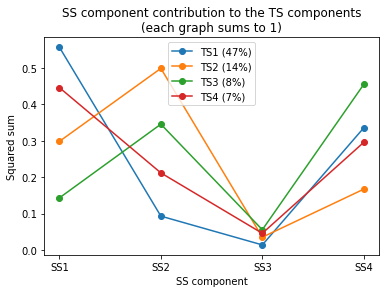

In [117]:
n_ts_comps = 5
for i, comp in enumerate(ts_components.reshape(-1, 30, len(ss_variance))[:n_ts_comps]):
    squared_sum = np.sum(comp[:,:len(ss_variance)] ** 2, axis=0)
    variance = ts_variance[i]
    plt.plot(squared_sum, label=f'TS{i+1} ({variance*100:0.0f}%)', marker='o')
plt.legend()
plt.xlabel('SS component')
plt.ylabel('Squared sum')
title = 'SS component contribution to the TS components\n(each graph sums to 1)'
plt.title(title)
plt.xticks(np.arange(len(ss_variance)), [f'SS{d+1}' for d in range(len(ss_variance))])
plt.savefig(root_dir.joinpath(title + '.png'))

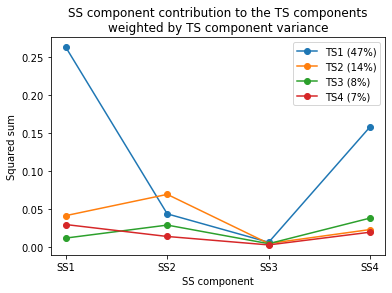

In [118]:
n_ts_comps = 5
for i, comp in enumerate(ts_components.reshape(-1, 30, len(ss_variance))[:n_ts_comps]):
    squared_sum = np.sum(comp[:,:len(ss_variance)] ** 2, axis=0)
    variance = ts_variance[i]
    plt.plot(squared_sum * variance, label=f'TS{i+1} ({variance*100:0.0f}%)', marker='o')
plt.legend()
plt.xlabel('SS component')
plt.ylabel('Squared sum')
title = 'SS component contribution to the TS components\nweighted by TS component variance'
plt.title(title)
plt.xticks(np.arange(len(ss_variance)), [f'SS{d+1}' for d in range(len(ss_variance))]);
plt.savefig(root_dir.joinpath(title + '.png'))

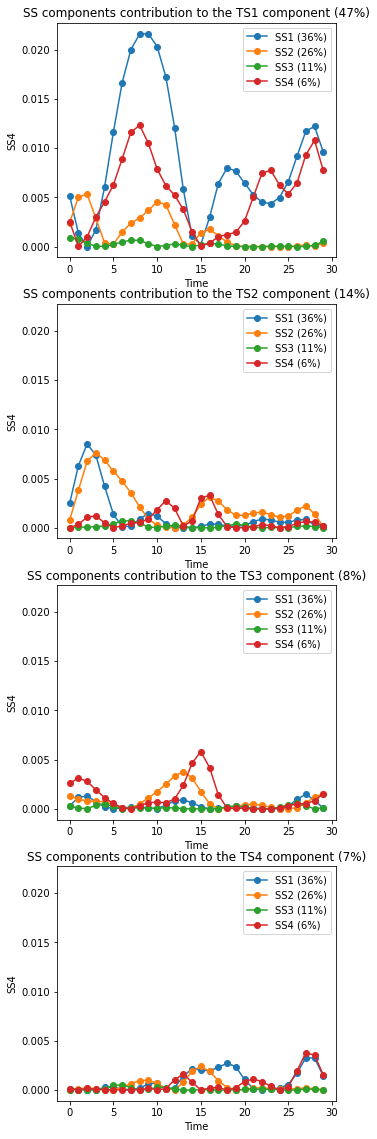

In [119]:
n_ss_comps = 4
n_ts_comps = 5
box_size = 5
plt.figure(figsize=(box_size, box_size * n_ts_comps))
title = f'SS components contribution to TS components shown in time.png'
for i, ts_comp in enumerate(ts_components.reshape(-1, 30, len(ss_variance))[:n_ts_comps]):
    plt.subplot(n_ts_comps, 1, i+1)
    for j, ss_comp in enumerate(ts_comp.T):
        variance = ts_variance[i]
        squares = ss_comp ** 2
        plt.plot(squares * variance, label=f'SS{j+1} ({ss_variance[j]*100:0.0f}%)', marker='o')
        plt.legend()
        plt.xlabel('Time')
        plt.ylabel(f'SS{j+1}')
        plt.title(f'SS components contribution to the TS{i+1} component ({ts_variance[i]*100:0.0f}%)')
    if i == 0:
        ylim = plt.ylim()
    else:
        plt.ylim(ylim)
plt.savefig(root_dir.joinpath(title))